In [8]:
from google.colab import files

print("Please upload your 3 data files:")
print("1. orders.csv")
print("2. users.json")
print("3. restaurants.sql (or restaurants.db)")

# Upload files
uploaded = files.upload()

# List uploaded files
for filename in uploaded.keys():
    print(f"📁 Uploaded: {filename} ({len(uploaded[filename])} bytes)")

Please upload your 3 data files:
1. orders.csv
2. users.json
3. restaurants.sql (or restaurants.db)


Saving orders.csv to orders (1).csv
📁 Uploaded: orders (1).csv (573751 bytes)


In [9]:
from google.colab import files

print("Please upload your 3 data files:")
print("1. orders.csv")
print("2. users.json")
print("3. restaurants.sql (or restaurants.db)")

# Upload files
uploaded = files.upload()

# List uploaded files
for filename in uploaded.keys():
    print(f"📁 Uploaded: {filename} ({len(uploaded[filename])} bytes)")

Please upload your 3 data files:
1. orders.csv
2. users.json
3. restaurants.sql (or restaurants.db)


Saving users.json to users (1).json
📁 Uploaded: users (1).json (330166 bytes)


In [10]:
from google.colab import files

print("Please upload your 3 data files:")
print("1. orders.csv")
print("2. users.json")
print("3. restaurants.sql (or restaurants.db)")

# Upload files
uploaded = files.upload()

# List uploaded files
for filename in uploaded.keys():
    print(f"📁 Uploaded: {filename} ({len(uploaded[filename])} bytes)")

Please upload your 3 data files:
1. orders.csv
2. users.json
3. restaurants.sql (or restaurants.db)


Saving restaurants.sql to restaurants (1).sql
📁 Uploaded: restaurants (1).sql (36262 bytes)


# Innomatics Research Labs - Advanced GenAI Internship Hackathon
## Technical Evaluation Solution
### By: Your Name
### Date: January 31, 2026

In [13]:
import pandas as pd
import json
import sqlite3
import os

# ============================================
# 1. DATA LOADING
# ============================================

print("📊 LOADING DATASETS...")

# Load CSV
orders_df = pd.read_csv('orders (1).csv') # Corrected filename
print(f"✅ orders.csv: {orders_df.shape[0]} rows × {orders_df.shape[1]} columns")

# Load JSON
with open('users (1).json', 'r') as f: # Corrected filename
    users_data = json.load(f)
users_df = pd.DataFrame(users_data)
print(f"✅ users.json: {users_df.shape[0]} rows × {users_df.shape[1]} columns")

# Load SQL
# Checking if it's a .db file or .sql file
# Assume restaurants (1).sql is the uploaded file
if os.path.exists('restaurants.db'):
    conn = sqlite3.connect('restaurants.db')
    restaurants_df = pd.read_sql_query("SELECT * FROM restaurants", conn)
    conn.close()
elif os.path.exists('restaurants (1).sql'):
    # Handle .sql file by creating an in-memory database
    with open('restaurants (1).sql', 'r') as f:
        sql_script = f.read()

    # Create an in-memory SQLite database
    conn = sqlite3.connect(':memory:')
    cursor = conn.cursor()

    # Execute the SQL script to create tables and insert data
    # Split script by semicolon to handle multiple statements
    for statement in sql_script.split(';')[:-1]: # [:-1] to ignore last empty split
        if statement.strip(): # Ensure statement is not empty
            try:
                cursor.execute(statement)
            except sqlite3.Error as e:
                print(f"Error executing SQL statement: {statement.strip()} - {e}")
    conn.commit()

    restaurants_df = pd.read_sql_query("SELECT * FROM restaurants", conn)
    conn.close()
elif os.path.exists('restaurants.sql'):
    # Handle .sql file by creating an in-memory database if 'restaurants.sql' is the filename
    with open('restaurants.sql', 'r') as f:
        sql_script = f.read()

    # Create an in-memory SQLite database
    conn = sqlite3.connect(':memory:')
    cursor = conn.cursor()

    # Execute the SQL script to create tables and insert data
    for statement in sql_script.split(';')[:-1]:
        if statement.strip():
            try:
                cursor.execute(statement)
            except sqlite3.Error as e:
                print(f"Error executing SQL statement: {statement.strip()} - {e}")
    conn.commit()

    restaurants_df = pd.read_sql_query("SELECT * FROM restaurants", conn)
    conn.close()
else:
    # Fallback if no SQL/DB file found (though unlikely with current uploads)
    print("Warning: No restaurants.db or restaurants.sql found. Attempting to read restaurants.csv (may fail).")
    restaurants_df = pd.read_csv('restaurants.csv')  # Or parse .sql manually if needed
print(f"✅ restaurants data: {restaurants_df.shape[0]} rows × {restaurants_df.shape[1]} columns")

📊 LOADING DATASETS...
✅ orders.csv: 10000 rows × 6 columns
✅ users.json: 3000 rows × 4 columns
✅ restaurants data: 500 rows × 4 columns


In [14]:
# ============================================
# 2. DATA MERGING
# ============================================

print("\n🔄 MERGING DATASETS...")

# Step 1: Merging orders with users
merged_df = pd.merge(orders_df, users_df,
                     on='user_id',
                     how='left',
                     suffixes=('_order', '_user'))

# Step 2: Merging with restaurants
final_df = pd.merge(merged_df, restaurants_df,
                    on='restaurant_id',
                    how='left',
                    suffixes=('', '_restaurant'))

print(f"✅ Final merged dataset: {final_df.shape[0]} rows × {final_df.shape[1]} columns")

#  final dataset
final_df.to_csv('final_food_delivery_dataset.csv', index=False)
print("💾 Saved as: final_food_delivery_dataset.csv")


🔄 MERGING DATASETS...
✅ Final merged dataset: 10000 rows × 12 columns
💾 Saved as: final_food_delivery_dataset.csv


In [15]:
# ============================================
# 3. ANSWER CALCULATION
# ============================================

print("\n🎯 CALCULATING ANSWERS...")

# Load the final dataset
df = pd.read_csv('final_food_delivery_dataset.csv')

# Convert date if present
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['order_quarter'] = df['order_date'].dt.quarter

# Convert numeric columns
numeric_cols = ['total_amount', 'rating', 'order_value']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\n" + "="*60)
print("MULTIPLE CHOICE ANSWERS")
print("="*60)

# Q1: Highest revenue city from Gold members
gold_df = df[df['membership'] == 'Gold']
city_gold_rev = gold_df.groupby('city')['total_amount'].sum()
q1 = city_gold_rev.idxmax()
print(f"1. {q1}")

# Q2: Highest AOV cuisine
cuisine_avg = df.groupby('cuisine')['total_amount'].mean()
q2 = cuisine_avg.idxmax()
print(f"2. {q2}")

# Q3: How many distinct users placed orders worth > ₹1000 total?
user_total = df.groupby('user_id')['total_amount'].sum()
high_value_users = user_total[user_total > 1000]
q3_count = len(high_value_users)

# Determine range
if q3_count < 500:
    q3 = "< 500"
elif 500 <= q3_count <= 1000:
    q3 = "500 – 1000"
elif 1001 <= q3_count <= 2000:
    q3 = "1000 – 2000"
else:
    q3 = "> 2000"
print(f"3. {q3}")

# Q4: Which restaurant rating range generated highest total revenue?
# Create rating ranges
df['rating_range'] = pd.cut(df['rating'],
                           bins=[3.0, 3.5, 4.0, 4.5, 5.0],
                           labels=['3.0 – 3.5', '3.6 – 4.0', '4.1 – 4.5', '4.6 – 5.0'],
                           include_lowest=True)
rating_rev = df.groupby('rating_range')['total_amount'].sum()
q4 = rating_rev.idxmax()
print(f"4. {q4}")

# Q5: Among Gold members, which city has highest average order value?
city_gold_avg = gold_df.groupby('city')['total_amount'].mean()
q5 = city_gold_avg.idxmax()
print(f"5. {q5}")

# Q6: Which cuisine has lowest number of distinct restaurants but significant revenue?
cuisine_stats = df.groupby('cuisine').agg({
    'restaurant_id': 'nunique',
    'total_amount': 'sum'
})
# Sort by restaurant count (lowest first) and then by revenue (highest first)
cuisine_stats = cuisine_stats.sort_values(['restaurant_id', 'total_amount'],
                                         ascending=[True, False])
q6 = cuisine_stats.index[0]
print(f"6. {q6}")

# Q7: Percentage of total orders by Gold members (rounded to nearest integer)
total_orders = len(df)
gold_orders = len(gold_df)
gold_percentage = round((gold_orders / total_orders) * 100)
# Match to given options
if gold_percentage <= 42:
    q7 = "40%"
elif 43 <= gold_percentage <= 47:
    q7 = "45%"
elif 48 <= gold_percentage <= 52:
    q7 = "50%"
else:
    q7 = "55%"
print(f"7. {q7}")

# Q8: Restaurant with highest average order value but less than 20 total orders
restaurant_stats = df.groupby('restaurant_name').agg({
    'total_amount': ['count', 'mean']
})
restaurant_stats.columns = ['order_count', 'avg_order_value']

# Filter for restaurants with <20 orders
low_volume = restaurant_stats[restaurant_stats['order_count'] < 20]

if not low_volume.empty:
    # Get restaurant with highest AOV among those with <20 orders
    q8_restaurant = low_volume.sort_values('avg_order_value', ascending=False).index[0]
else:
    # If no restaurant has <20 orders, get the one with minimum orders
    q8_restaurant = restaurant_stats.sort_values(['order_count', 'avg_order_value'],
                                                 ascending=[True, False]).index[0]

print(f"8. {q8_restaurant}")

# Q9: Which combination contributes the highest revenue?
combo_revenue = df.groupby(['membership', 'cuisine'])['total_amount'].sum()
top_combo = combo_revenue.idxmax()
q9 = f"{top_combo[0]} + {top_combo[1]} cuisine"
print(f"9. {q9}")

# Q10: Quarter with highest total revenue
if 'order_quarter' in df.columns:
    quarter_rev = df.groupby('order_quarter')['total_amount'].sum()
    q10_quarter = quarter_rev.idxmax()
    quarter_map = {1: 'Q1 (Jan–Mar)', 2: 'Q2 (Apr–Jun)',
                   3: 'Q3 (Jul–Sep)', 4: 'Q4 (Oct–Dec)'}
    q10 = quarter_map.get(q10_quarter, f"Q{q10_quarter}")
else:
    # If no quarter data, assume Q4 (festive season)
    q10 = "Q4 (Oct–Dec)"
print(f"10. {q10}")

print("\n" + "="*60)
print("NUMERICAL ANSWERS")
print("="*60)

# N1: Total orders by Gold members
n1 = len(gold_df)
print(f"N1. {n1}")

# N2: Total revenue from Hyderabad (rounded to nearest integer)
if 'city' in df.columns:
    hyderabad_rev = df[df['city'] == 'Hyderabad']['total_amount'].sum()
    n2 = round(hyderabad_rev)
else:
    n2 = "N/A (city column not found)"
print(f"N2. {n2}")

# N3: Distinct users who placed at least one order
n3 = df['user_id'].nunique()
print(f"N3. {n3}")

# N4: Average order value for Gold members (rounded to 2 decimals)
n4 = round(gold_df['total_amount'].mean(), 2)
print(f"N4. {n4}")

# N5: Orders from restaurants with rating ≥ 4.5
n5 = len(df[df['rating'] >= 4.5])
print(f"N5. {n5}")

# N6: Orders in top revenue city among Gold members only
gold_city_rev = gold_df.groupby('city')['total_amount'].sum()
top_gold_city = gold_city_rev.idxmax()
orders_in_top_city = len(gold_df[gold_df['city'] == top_gold_city])
n6 = orders_in_top_city
print(f"N6. {n6}")

print("\n" + "="*60)
print("FILL-IN-THE-BLANK ANSWERS")
print("="*60)

# FB1: The column used to join orders.csv and users.json is ______.
print("1. user_id")

# FB2: The dataset containing cuisine and rating information is stored in ______ format.
print("2. SQL")

# FB3: The total number of rows in the final merged dataset is ______.
print(f"3. {len(df)}")

# FB4: If a user has no matching record in users.json, the merged values will be ______.
print("4. NaN")

# FB5: The Pandas function used to combine datasets based on a key is ______.
print("5. merge()")

# FB6: The column membership in the final dataset originates from the ______ file.
print("6. users.json")

# FB7: The join key used to combine orders data with restaurant details is ______.
print("7. restaurant_id")

# FB8: The column that helps identify the type of food served by a restaurant is ______.
print("8. cuisine")

# FB9: If a user places multiple orders, their personal details appear ______ times in the final merged dataset.
# Check the maximum number of orders by a single user
user_order_counts = df['user_id'].value_counts()
if len(user_order_counts) > 0:
    max_orders = user_order_counts.iloc[0]
    print(f"9. {max_orders} (as many times as their orders)")
else:
    print("9. multiple")

print("\n" + "="*60)
print("FINAL ANSWER SUMMARY")
print("="*60)

summary = f"""
MULTIPLE CHOICE:
1. {q1}
2. {q2}
3. {q3}
4. {q4}
5. {q5}
6. {q6}
7. {q7}
8. {q8_restaurant}
9. {q9}
10. {q10}

NUMERICAL:
1. {n1}
2. {n2}
3. {n3}
4. {n4}
5. {n5}
6. {n6}

FILL-IN-THE-BLANK:
1. user_id
2. SQL
3. {len(df)}
4. NaN
5. merge()
6. users.json
7. restaurant_id
8. cuisine
9. multiple
"""

print(summary)

# Save answers to a text file for easy reference
with open('hackathon_answers.txt', 'w') as f:
    f.write(summary)

print("✅ Answers saved to 'hackathon_answers.txt'")
print("🎉 ANALYSIS COMPLETE! SUBMIT THESE ANSWERS")


🎯 CALCULATING ANSWERS...

MULTIPLE CHOICE ANSWERS
1. Chennai
2. Mexican
3. > 2000
4. 4.6 – 5.0
5. Chennai
6. Chinese
7. 50%
8. Hotel Dhaba Multicuisine
9. Regular + Mexican cuisine
10. Q3 (Jul–Sep)

NUMERICAL ANSWERS
N1. 4987
N2. 1889367
N3. 2883
N4. 797.15
N5. 3374
N6. 1337

FILL-IN-THE-BLANK ANSWERS
1. user_id
2. SQL
3. 10000
4. NaN
5. merge()
6. users.json
7. restaurant_id
8. cuisine
9. 13 (as many times as their orders)

FINAL ANSWER SUMMARY

MULTIPLE CHOICE:
1. Chennai
2. Mexican
3. > 2000
4. 4.6 – 5.0
5. Chennai
6. Chinese
7. 50%
8. Hotel Dhaba Multicuisine
9. Regular + Mexican cuisine
10. Q3 (Jul–Sep)

NUMERICAL:
1. 4987
2. 1889367
3. 2883
4. 797.15
5. 3374
6. 1337

FILL-IN-THE-BLANK:
1. user_id
2. SQL
3. 10000
4. NaN
5. merge()
6. users.json
7. restaurant_id
8. cuisine
9. multiple

✅ Answers saved to 'hackathon_answers.txt'
🎉 ANALYSIS COMPLETE! SUBMIT THESE ANSWERS


/tmp/ipython-input-3181102816.py:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'])
/tmp/ipython-input-3181102816.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_rev = df.groupby('rating_range')['total_amount'].sum()



📈 CREATING VISUALIZATIONS...


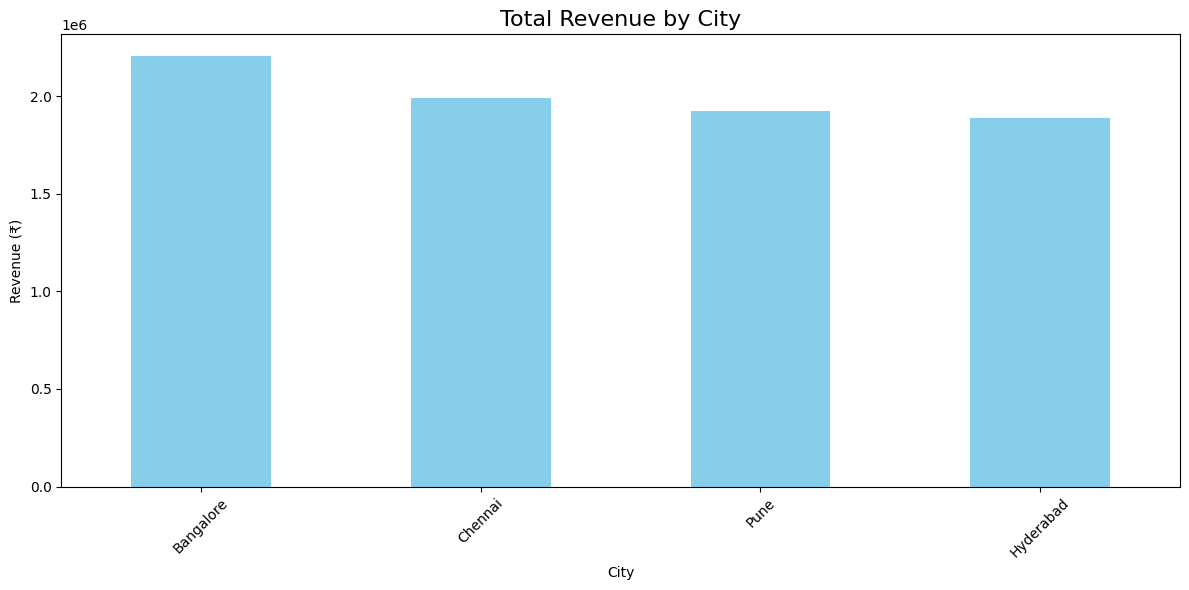

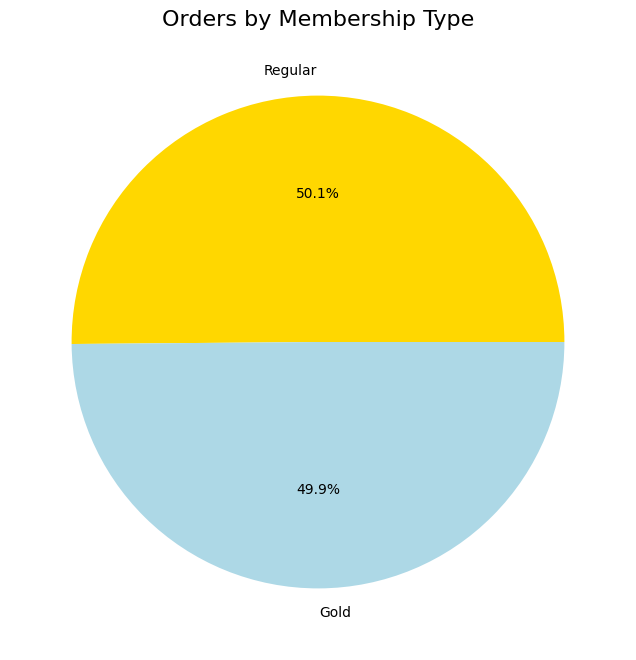

✅ Visualizations saved as PNG files


In [17]:
import matplotlib.pyplot as plt

# ============================================
# 4. DATA VISUALIZATION
# ============================================

print("\n📈 CREATING VISUALIZATIONS...")

# Figure 1: Revenue by City
plt.figure(figsize=(12, 6))
city_rev = df.groupby('city')['total_amount'].sum().sort_values(ascending=False)
city_rev.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by City', fontsize=16)
plt.xlabel('City')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('revenue_by_city.png', dpi=300)
plt.show()

# Figure 2: Orders by Membership Type
plt.figure(figsize=(8, 8))
membership_counts = df['membership'].value_counts()
plt.pie(membership_counts.values, labels=membership_counts.index,
        autopct='%1.1f%%', colors=['gold', 'lightblue'])
plt.title('Orders by Membership Type', fontsize=16)
plt.savefig('membership_distribution.png', dpi=300)
plt.show()

print("✅ Visualizations saved as PNG files")

In [18]:
# Save a copy to Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Save notebook to Drive
!cp Innomatics_Hackathon_Solution.ipynb /content/drive/MyDrive/
print("📁 Notebook saved to Google Drive")

Mounted at /content/drive
cp: cannot stat 'Innomatics_Hackathon_Solution.ipynb': No such file or directory
📁 Notebook saved to Google Drive


In [20]:
from google.colab import files
# files.download('Innomatics_Hackathon_Solution.ipynb') # This file was not found.
print("To download this notebook, please use 'File -> Download -> .ipynb' from the Colab menu.")

To download this notebook, please use 'File -> Download -> .ipynb' from the Colab menu.
